# Error types

Type I Error (α error) : Rejecting the null hypothesis 𝐻0 when it is actually true    
..  
Type II Error (β error) : Failing to reject the null hypothesis 𝐻0 when it is actually false.

### significance level effect

alpha is the probability of making a Type I error, i.e. rejecting a true null hypothesis (the risk you’re willing to take of being wrong when you claim a difference exists)

the more you increase α (alpha), bigger the rejecting area , which means:The probability of rejecting the null hypothesis 𝐻0 increases

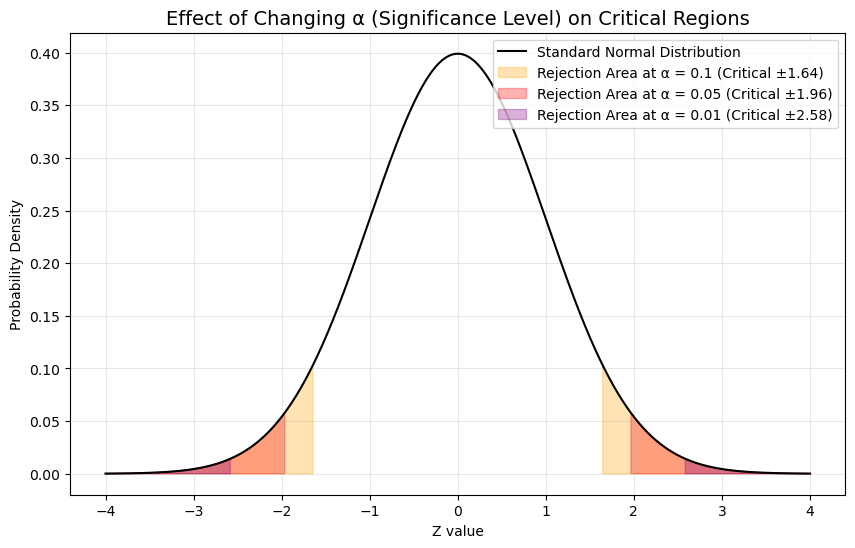

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# X-axis range
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Different alpha levels for two-tailed test
alphas = [0.10, 0.05, 0.01]

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='black', label='Standard Normal Distribution')

colors = ['orange', 'red', 'purple']

for i, alpha in enumerate(alphas):
    z_crit = norm.ppf(1 - alpha/2)  # critical z-value for two-tailed test
    plt.fill_between(x, y, where=(x <= -z_crit) | (x >= z_crit), 
                     color=colors[i], alpha=0.3, label=f'Rejection Area at α = {alpha} (Critical ±{z_crit:.2f})')

plt.title("Effect of Changing α (Significance Level) on Critical Regions", fontsize=14)
plt.xlabel("Z value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### how to choose Alpha

Choose a smaller α when the cost of a false positive (Type I error) is high , Choose a larger α when the cost of missing a real effect (Type II error) is high.  
##### Examples : 
Medicine , nuclear safety   
H0 => safe medicine & Radiation level ------ type I error => say not safe medicine or radiation level while it's safe (expensive but safe on lives)  
H1 => not safe medicine & Radiation -------- type II error => say safe medicine or radiation level while it's not safe (people could die)  
types II error is more critical so we choose larger alpha not to miss real dangers and reject more H0  


# Test Types based on direction

### 1.Two-Tailed Test (Non-Directional Test)  
Used when: we are testing for any difference (increase or decrease).  
𝐻0 : 𝜇=100  
𝐻1 : 𝜇!=100  

### 2.Right-Tailed Test (One-Tailed)
Used when: you only care about detecting an increase.  
𝐻0 : 𝜇<=100    
𝐻1 : 𝜇>100    

### 3.Left-Tailed Test (One-Tailed)
Used when: you only care about detecting a decrease.  
𝐻0 : 𝜇>=100  
𝐻1 : 𝜇<100  

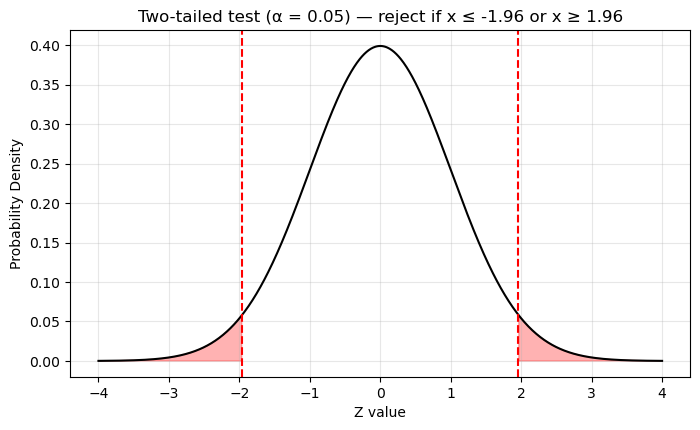

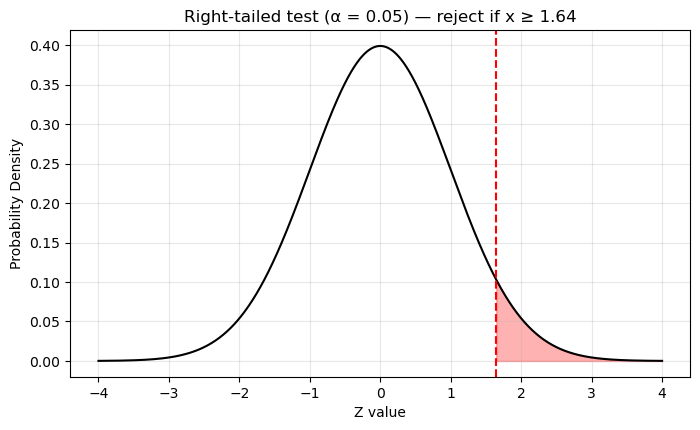

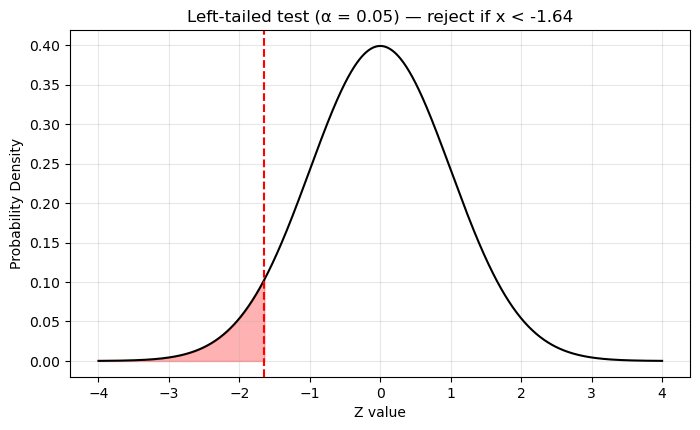

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
alpha = 0.05  # same alpha for all tests
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Critical values
z_two = norm.ppf(1 - alpha/2)   # two-tailed: ±z_two
z_right = norm.ppf(1 - alpha)   # right-tailed
z_left = norm.ppf(alpha)        # left-tailed

# ---------------------- Two-tailed ----------------------
plt.figure(figsize=(8, 4.5))
plt.plot(x, y, color='black')
plt.fill_between(x, y, where=(x <= -z_two) | (x >= z_two), color='red', alpha=0.3)
plt.axvline(-z_two, linestyle='--', color='red')
plt.axvline(z_two, linestyle='--', color='red')
plt.title(f"Two-tailed test (α = {alpha}) — reject if x ≤ -{z_two:.2f} or x ≥ {z_two:.2f}")
plt.xlabel("Z value")
plt.ylabel("Probability Density")
plt.grid(alpha=0.3)
plt.show()

# ---------------------- Right-tailed ----------------------
plt.figure(figsize=(8, 4.5))
plt.plot(x, y, color='black')
plt.fill_between(x, y, where=(x >= z_right), color='red', alpha=0.3)
plt.axvline(z_right, linestyle='--', color='red')
plt.title(f"Right-tailed test (α = {alpha}) — reject if x ≥ {z_right:.2f}")
plt.xlabel("Z value")
plt.ylabel("Probability Density")
plt.grid(alpha=0.3)
plt.show()

# ---------------------- Left-tailed ----------------------
plt.figure(figsize=(8, 4.5))
plt.plot(x, y, color='black')
plt.fill_between(x, y, where=(x <= z_left), color='red', alpha=0.3)
plt.axvline(z_left, linestyle='--', color='red')
plt.title(f"Left-tailed test (α = {alpha}) — reject if x < {z_left:.2f}")
plt.xlabel("Z value")
plt.ylabel("Probability Density")
plt.grid(alpha=0.3)
plt.show()
